In [16]:
import sympy as sp
import numpy as np
import matplotlib.pylab as plt

In [17]:
w = sp.Symbol(r'w', real=True)
s = sp.Symbol(r's', real = True)
d_a, E_c = sp.symbols(r'd_a, E_c', nonnegative=True)
f_t = sp.symbols(r'f_t', nonnegative=True)
c_2 = sp.Symbol('c_2', nonnegative=True)
c_1 = sp.Symbol('c_1', nonnegative=True)
f_c = sp.Symbol('f_c', nonnegative =True)
# a_3, a_4, r = f_c = sp.symbols('a_3, a_4, r', nonnegative =True)
# tau_0 = sp.Symbol(r'\tau_0', nonnegative =True)

In [18]:
G_f = 0.028 * f_c ** 0.18 * d_a ** 0.32

L_cr = E_c * G_f / f_t ** 2

w_cr = f_t / E_c * L_cr

f_w = f_t * sp.exp(-f_t * w / G_f)

w_x = 5.14 * (G_f / f_t)


r = s / w

tau_0 = 0.3 * f_c

a_3 = 2.45 / tau_0

a_4 = 2.44 * (1 - (4 / tau_0))

In [19]:
tau_s = sp.Piecewise(
        (0, w <= 0),
        (tau_0 * (1 - sp.sqrt((2 * w) / d_a)) * r * (a_3 + (a_4 * np.abs(r) ** 3)) / (1 + (a_4 * r ** 4)), w > 0)

    )
tau_s

Piecewise((0, w <= 0), (0.3*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 32.5333333333333/f_c)*Abs(s/w)**3 + 8.16666666666667/f_c)/(w*(s**4*(2.44 - 32.5333333333333/f_c)/w**4 + 1)), True))

In [20]:
sigma_ag = sp.Piecewise(
        (0, w <= 0),
        (-0.62 * tau_s * (s) / (w**2 + r ** 2) ** 0.25, w > 0)
    )
sigma_ag

Piecewise((0, w <= 0), (-0.62*s*Piecewise((0, w <= 0), (0.3*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 32.5333333333333/f_c)*Abs(s/w)**3 + 8.16666666666667/f_c)/(w*(s**4*(2.44 - 32.5333333333333/f_c)/w**4 + 1)), True))/(s**2/w**2 + w**2)**0.25, True))

In [21]:
sig_w = sp.Piecewise(
        (-f_c, w / L_cr <= - f_c / E_c),
        (E_c * w / L_cr, w <= w_cr),
        (f_w, w <= w_x),
        (sigma_ag, True)
    )

In [22]:
sig_w

Piecewise((-f_c, f_c/E_c <= -35.7142857142857*f_t**2*w/(E_c*d_a**0.32*f_c**0.18)), (35.7142857142857*f_t**2*w/(d_a**0.32*f_c**0.18), w <= 0.028*d_a**0.32*f_c**0.18/f_t), (f_t*exp(-35.7142857142857*f_t*w/(d_a**0.32*f_c**0.18)), w <= 0.14392*d_a**0.32*f_c**0.18/f_t), (Piecewise((0, w <= 0), (-0.62*s*Piecewise((0, w <= 0), (0.3*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 32.5333333333333/f_c)*Abs(s/w)**3 + 8.16666666666667/f_c)/(w*(s**4*(2.44 - 32.5333333333333/f_c)/w**4 + 1)), True))/(s**2/w**2 + w**2)**0.25, True)), True))

In [23]:
params = {
    d_a : 22,
    E_c : 28000,
    f_t : 3,
    c_2 : 6,
    c_1 : 3,
    f_c : 30
}

In [24]:
get_sig_w = sp.lambdify((w,s), sig_w.subs(params), 'numpy')
sig_w.subs(params)

Piecewise((-30, 64.8078172314006*w <= -30), (64.8078172314006*w, w <= 0.0462907119566811), (3*exp(-21.6026057438002*w), w <= 0.237934259457341), (Piecewise((0, w <= 0), (-0.62*s*Piecewise((0, w <= 0), (9.0*s*(-sqrt(11)*sqrt(w)/11 + 1)*(1.35555555555556*Abs(s/w)**3 + 0.272222222222222)/(w*(1.35555555555556*s**4/w**4 + 1)), True))/(s**2/w**2 + w**2)**0.25, True)), True))

In [25]:
get_tau_s = sp.lambdify((w,s), tau_s.subs(params), 'numpy')
tau_s.subs(params)

Piecewise((0, w <= 0), (9.0*s*(-sqrt(11)*sqrt(w)/11 + 1)*(1.35555555555556*Abs(s/w)**3 + 0.272222222222222)/(w*(1.35555555555556*s**4/w**4 + 1)), True))

In [26]:
get_sig_ag = sp.lambdify((w,s), sigma_ag.subs(params), 'numpy')
sigma_ag.subs(params)

Piecewise((0, w <= 0), (-0.62*s*Piecewise((0, w <= 0), (9.0*s*(-sqrt(11)*sqrt(w)/11 + 1)*(1.35555555555556*Abs(s/w)**3 + 0.272222222222222)/(w*(1.35555555555556*s**4/w**4 + 1)), True))/(s**2/w**2 + w**2)**0.25, True))

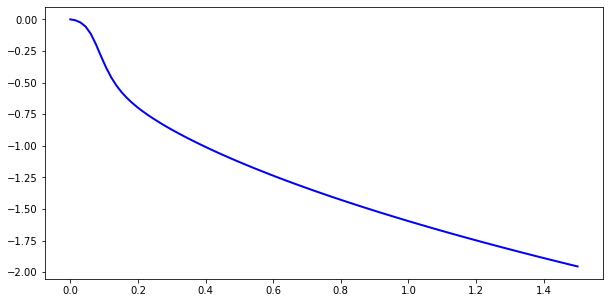

In [27]:
_, (ax1) = plt.subplots(1, 1, figsize=(10,5))
w_ = 0.1
s_data = np.linspace(0 , 1.5, 100)
sig_ag = get_sig_ag(w_, s_data)
ax1.plot(s_data, sig_ag, color='blue', lw=2);

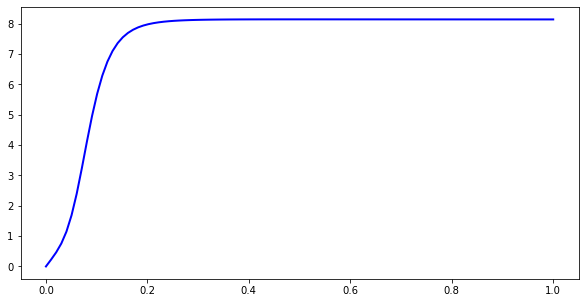

In [28]:
_, (ax1) = plt.subplots(1, 1, figsize=(10,5))
w_ = 0.1
s_data = np.linspace(0 , 1, 100)
tau_s_val = get_tau_s(w_, s_data)
ax1.plot(s_data, tau_s_val, color='blue', lw=2);
plt.show()

<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in sqrt
  return select([less_equal(64.8078172314006*w, -30),less_equal(w, 0.0462907119566811),less_equal(w, 0.237934259457341),True], [-30,64.8078172314006*w,3*exp(-21.6026057438002*w),select([less_equal(w, 0),True], [0,-0.62*s*(s**2/w**2 + w**2)**(-0.25)*select([less_equal(w, 0),True], [0,9.0*s*(-1/11*sqrt(11)*sqrt(w) + 1)*(1.35555555555556*abs(s/w)**3 + 0.272222222222222)/(w*(1.35555555555556*s**4/w**4 + 1))], default=nan)], default=nan)], default=nan)


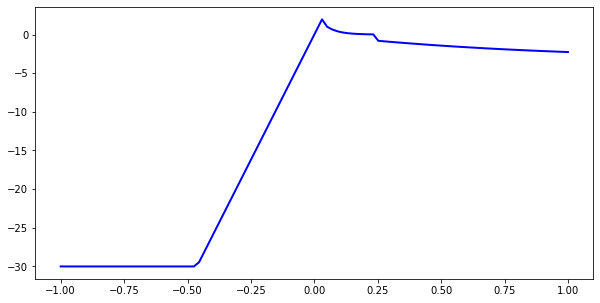

In [29]:
_, (ax1) = plt.subplots(1, 1, figsize=(10,5))
w_ = np.linspace(-1,1, 100)
s_data = np.linspace(-1 , 1, 100)
sig = get_sig_w(w_, s_data)
ax1.plot(w_, sig, color='blue', lw=2);